In [15]:
 # Required package to load data 
import xarray as xr
import os 
import datetime as dt

# Required packages for ploting 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade

import subprocess
import glob
import pandas as pd 
# In order to run the 'wget' command, wget needs to be available. 
# On a Windows machine, it is probably easiest to simply place the 'wget.exe' file 
# (see https://www.gnu.org/software/wget/) in the same directory as this Norebook

In [16]:
# Define function to run wget command
def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

In [23]:
def run_download(url,verbose=False):
    cmd = 'wget -c --no-check-certificate -r -np -nH --user=daafip --password=Joyfully-Distant-Backer7' 
    cmd += ' -nd -R "*.nc" ' # Only -nd relevant for METREF 15.nc, *30.nc, *45.nc
    cmd += url

    runcmd(cmd, verbose=verbose);

In [32]:
day=10
url = f'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/DMET/NETCDF/2023/03/{day}/'

In [33]:
run_download(url,verbose=True)

 --2023-04-03 12:09:03--  https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/DMET/NETCDF/2023/03/10/
Resolving datalsasaf.lsasvcs.ipma.pt (datalsasaf.lsasvcs.ipma.pt)... 193.137.20.109
Connecting to datalsasaf.lsasvcs.ipma.pt (datalsasaf.lsasvcs.ipma.pt)|193.137.20.109|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Restricted"
Reusing existing connection to datalsasaf.lsasvcs.ipma.pt:443.
HTTP request sent, awaiting response... 404 Not Found
2023-04-03 12:09:03 ERROR 404: Not Found.




In [26]:
files = glob.glob("*.nc")
ds = xr.open_mfdataset(files)

In [31]:
ds.close()

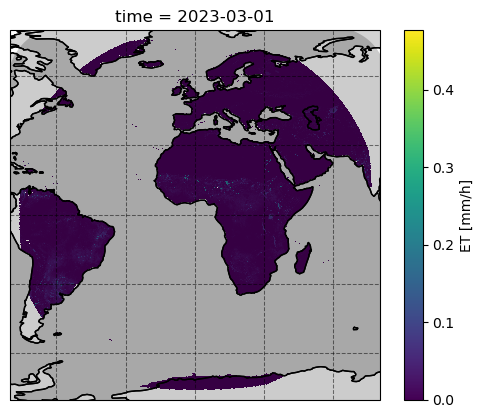

In [28]:
# to avoid showing warnings of cartopy
import warnings
warnings.filterwarnings('ignore')

slot=dt.datetime(2023,3,29,0,0)
# slot = lst_xr[3]
pvar = ds.ET.isel(time=0)
# ax = plt.axes(projection=ccrs.Orthographic(0, 0))  # to use the Orthographic projection 
ax = plt.axes(projection=ccrs.PlateCarree())      # to use simple lat/lon 
pvar.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),interpolation='nearest')
ax.coastlines()
ax.coastlines()
ax.add_feature(cfeature.OCEAN, facecolor='lightgray')
ax.add_feature(Nightshade(slot, alpha=0.2))
ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=False)

Gezeik